## KFServing Model Explainability

Install the necessary libraries

In [1]:
import os
import sys
import requests
import json
from matplotlib import pyplot as plt
import numpy as np
from aix360.datasets import MNISTDataset
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
import time
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images

Using TensorFlow backend.


Pick an image and wrap it to send to the inference service.

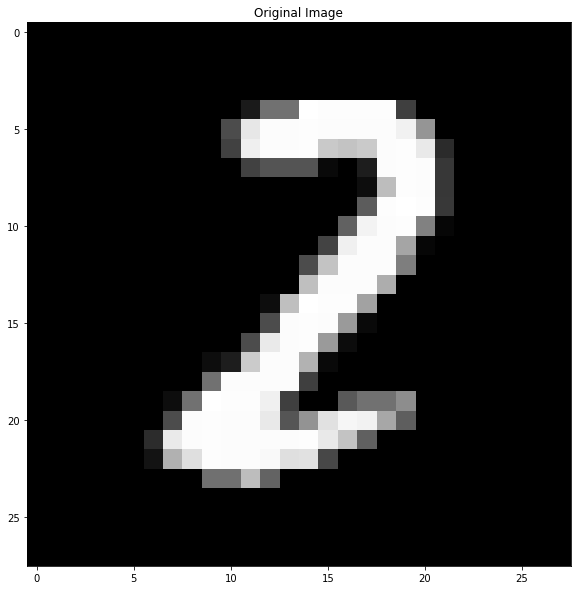

In [2]:
test_num = 1002
endpoint = "http://limeserver.some-cluster.cloud/v1/models/limeserver:explain"

data = MNISTDataset()
inputs = data.test_data[test_num]
labels = data.test_labels[test_num]
actual = 0
for x in range(1, len(labels)):
    if labels[x] != 0:
        actual = x
inputs = gray2rgb(inputs.reshape((-1, 28, 28)))
inputs = np.reshape(inputs, (28,28,3))
input_image = {"instances": [inputs.tolist()]}

fig0 = (data.test_data[test_num][:,:,0] + 0.5)*255
f, axarr = plt.subplots(1, 1, figsize=(10,10))
axarr.set_title("Original Image")
axarr.imshow(fig0, cmap="gray")
plt.show()

Send the image to the inference service.

In [3]:
x = time.time()
res = requests.post(endpoint, json=input_image)

print("TIME TAKEN: ", time.time() - x)
print(res)

TIME TAKEN:  47.712029218673706
<Response [200]>


Unwrap the response and display the explanations.

/usr/local/lib/python3.7/site-packages/skimage/color/colorlabel.py:111: UserWarning: Negative intensities in `image` are not supported
  bg_color, image_alpha)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1

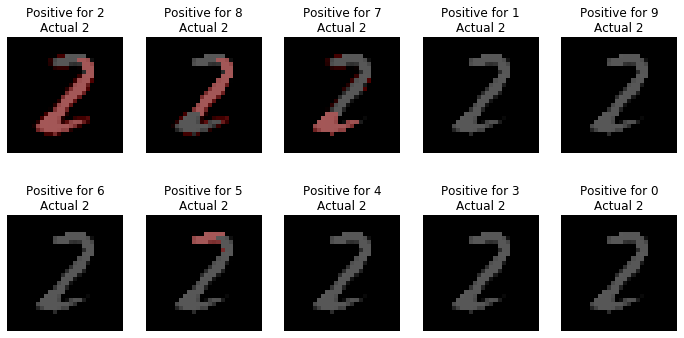

In [4]:
res_json = res.json()
temp = np.array(res_json["explanations"]["temp"])
masks = np.array(res_json["explanations"]["masks"])
top_labels = np.array(res_json["explanations"]["top_labels"])

fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    mask = masks[i]
    c_ax.imshow(label2rgb(mask, temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(top_labels[i], actual))
    c_ax.axis('off')
plt.show()